In [18]:
import cv2
import numpy as np
from skimage.color import rgb2lab, deltaE_cie76
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from scripts.range_extract_color import extract_color_using_range
from scripts.dist_extract_color import extract_color_using_dist

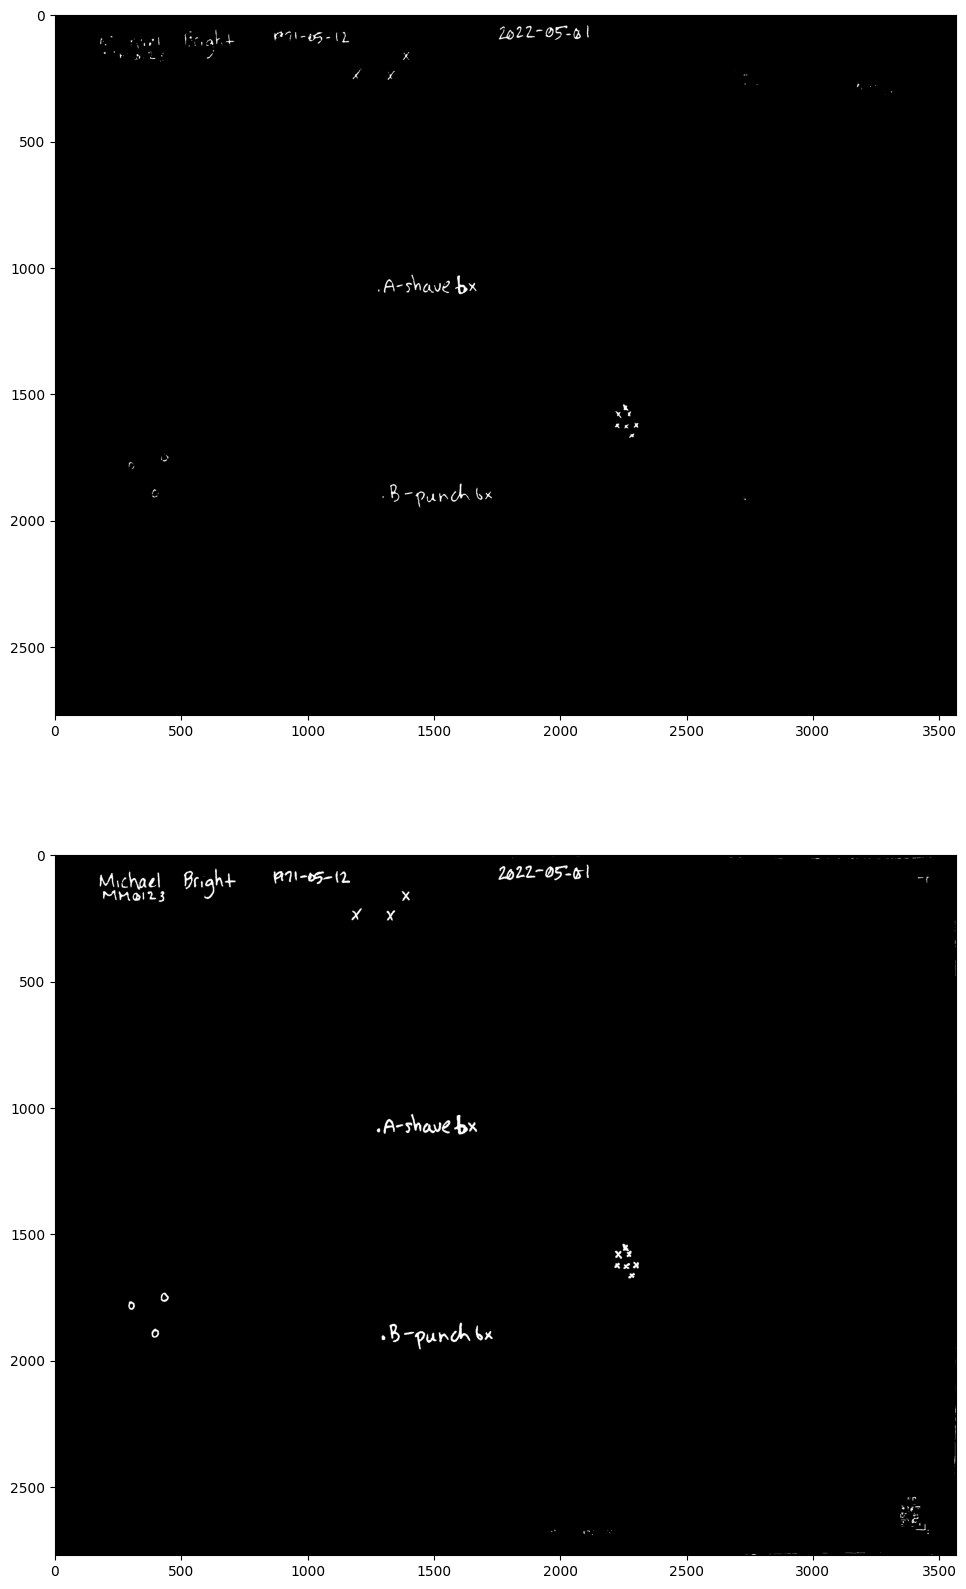

In [31]:
# paths
inp_img_pth = "../data/cropped/IMG_9770.JPG"
# reading image in bgr
img_bgr = cv2.imread(inp_img_pth)

# lab dist based extraction
extracted1 = extract_color_using_dist(img_bgr.copy(), "blue")

# hsv range based extraction
lower_range = np.array([110, 15, 0])
upper_range = np.array([150,255,210])
# upper_range = np.array([170,255,210])
extracted2 = extract_color_using_range(img_bgr.copy(), lower_range, upper_range)

plt.figure(figsize=(20, 20))
plt.subplot(211)
plt.imshow(extracted1, cmap="gray")
plt.subplot(212)
plt.imshow(extracted2, cmap="gray")

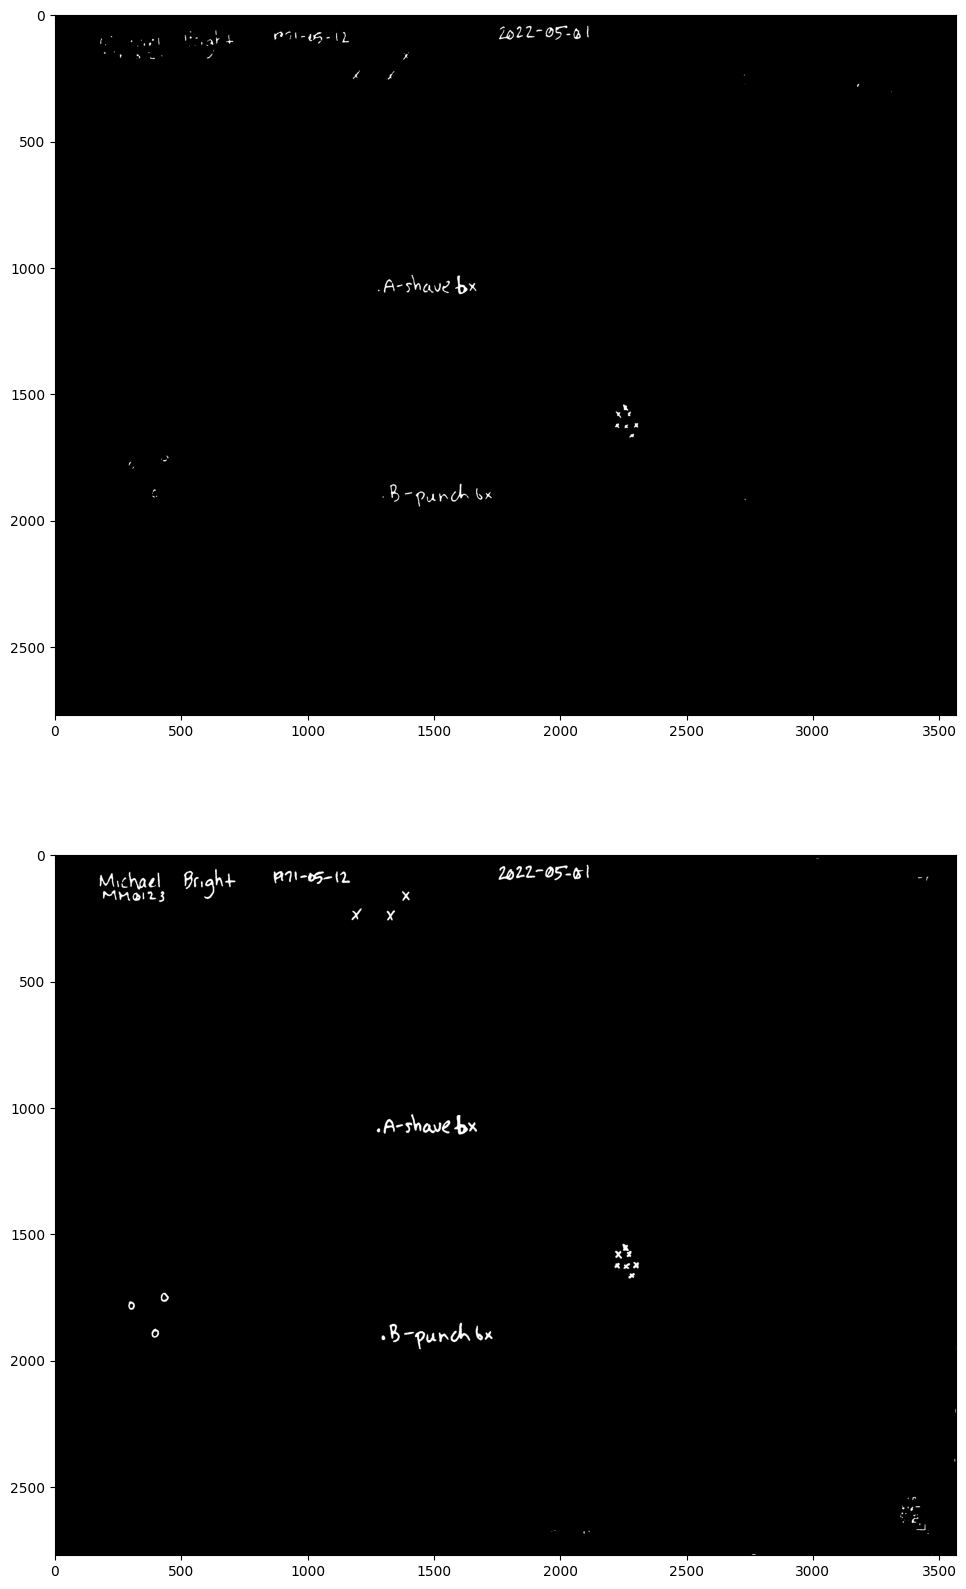

In [32]:
blurred1 = cv2.medianBlur(extracted1, 5)
blurred2 = cv2.medianBlur(extracted2, 5)
fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes[0].imshow(blurred1, cmap="gray")
axes[1].imshow(blurred2, cmap="gray")

# fig, axes = plt.subplots(2, 1, figsize=(20, 20))
# axes[0].imshow(extracted1, cmap="gray")
# axes[1].imshow(blurred1, cmap="gray")

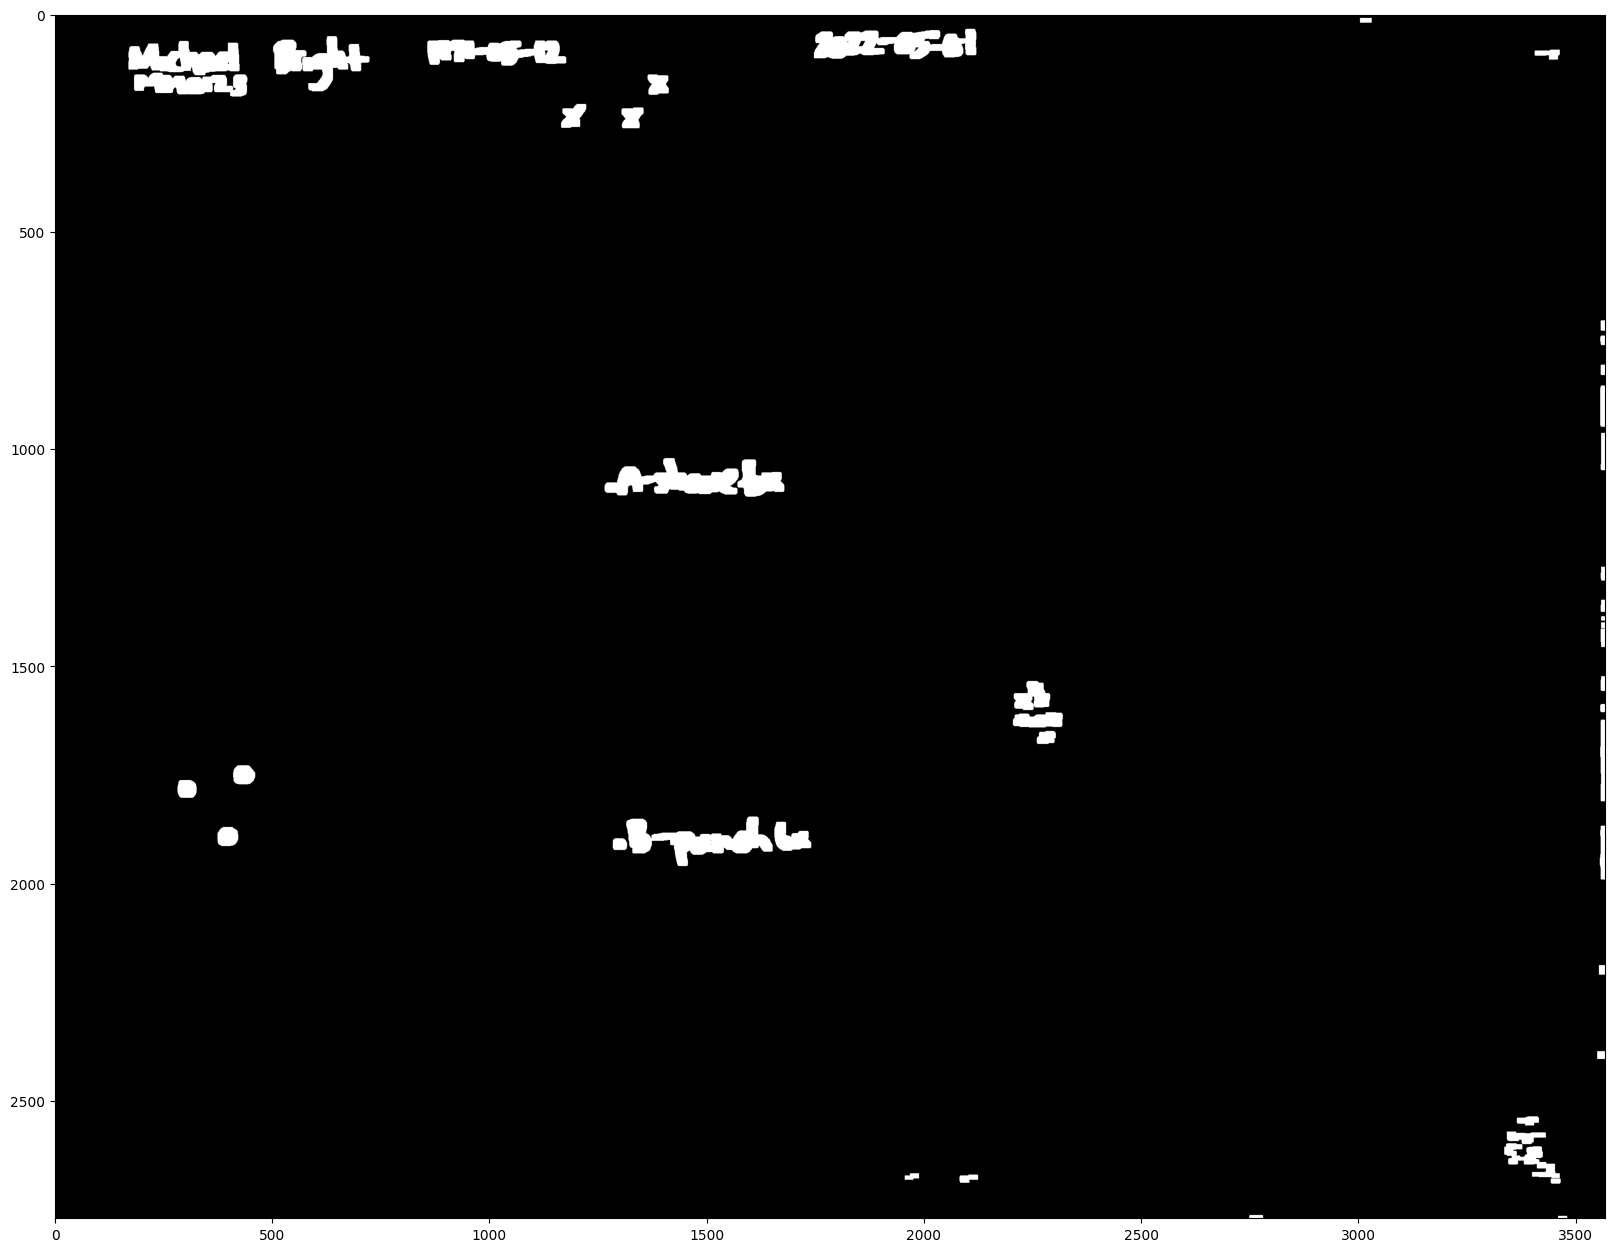

In [33]:
dilated = cv2.dilate(blurred2, np.ones((5, 10), np.uint8), iterations=2)
plt.figure(figsize=(20, 20))
plt.imshow(dilated, cmap="gray")
# fig, ax = plt.subplots(figsize=(20, 20))
# ax.imshow(dilated, cmap="gray")

In [34]:
# finding coordinates of white pixels from image having extracted color using lab dist based approach
coords_white = set(map(lambda pt: tuple(pt), np.argwhere(blurred1 == 255)))

In [35]:
# traversing over the image having extracted colors using hsv range based approach

# finding height and width of the image
h, w = img_bgr.shape[:2]

# creating canvas to draw white pixels
canvas = np.zeros(shape=(h, w))

# update coords to traverse neighbour pixels using following values
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]
# dx = [-1, 1, 0, 0, -1, 1, -1, 1]
# dy = [0, 0, -1, 1, -1, -1, 1, 1]

def isValid(pt):
    if pt[0] < 0 or pt[0] > h-1 or pt[1] < 0 or pt[1] > w-1 or dilated[pt] == 0 or vis[pt]:
        return False
    return True

from collections import deque

while coords_white:
    pt = coords_white.pop()
    q = deque()
    vis = np.zeros(shape=extracted2.shape)
    q.append(pt)
    vis[pt] = 1
    canvas[pt] = 255

    while q:
        curr_pt = q.popleft()
        for i in range(len(dx)):
            next_pt = curr_pt[0]+dx[i], curr_pt[1]+dy[i]
            if isValid(next_pt):
                try:
                    coords_white.remove(next_pt)
                except:
                    pass
                q.append(next_pt)
                vis[next_pt] = 1
                if blurred2[next_pt] == 255:
                    canvas[next_pt] = 255

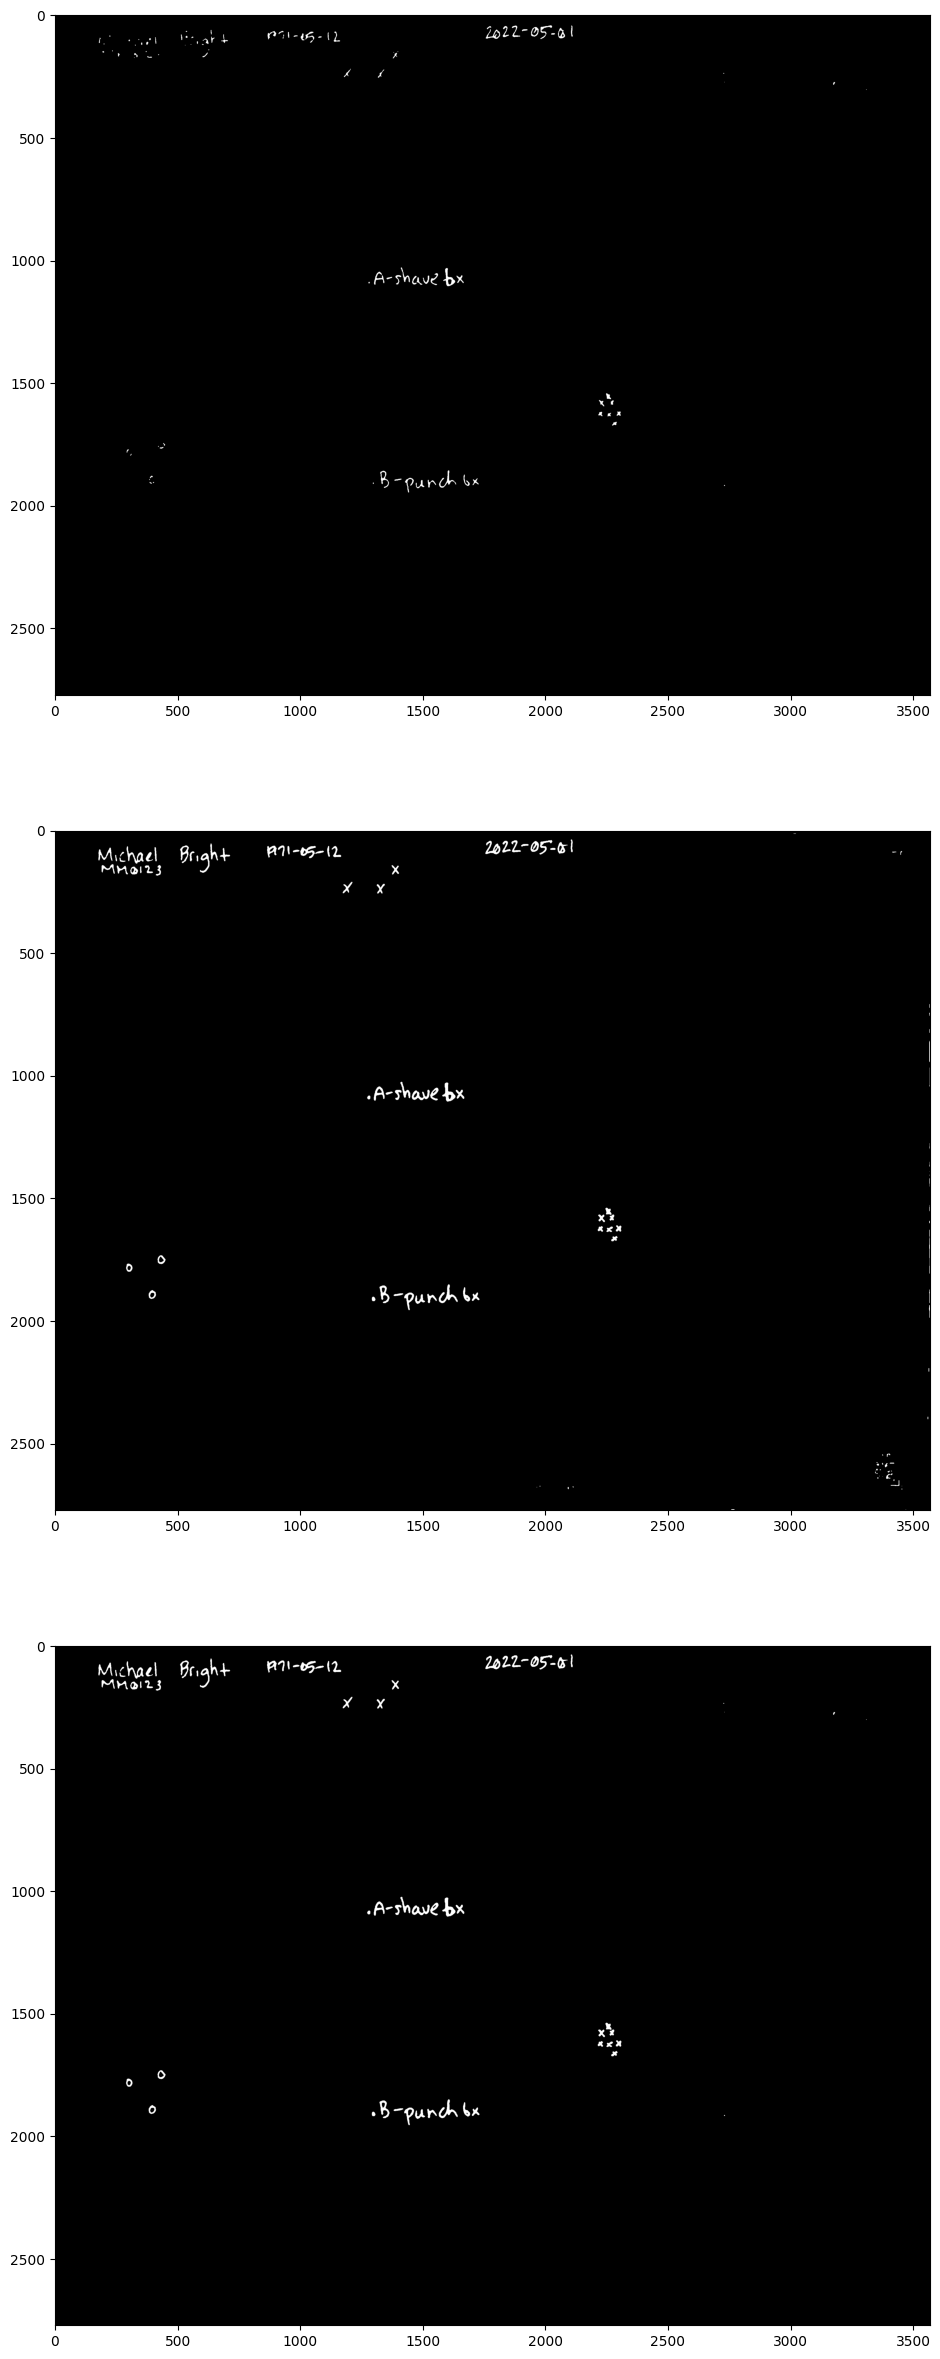

In [36]:
plt.figure(figsize=(30, 30))
plt.subplot(311)
plt.imshow(blurred1, cmap="gray")
plt.subplot(312)
plt.imshow(blurred2, cmap="gray")
plt.subplot(313)
plt.imshow(canvas, cmap="gray")